In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_86436/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.regression.linear_model as smlm
import sys
sys.path.append('../modules')
import choixglmstats

In [3]:
Malaria = pd.read_csv("../donnees/poissonData3.csv", header=0, sep=',')
Malaria["Sexe"] = Malaria["Sexe"].astype("category")
Malaria["Prev"] = Malaria["Prev"].astype("category")
print(Malaria.describe())

               Age     Altitude        Duree     Nmalaria
count  1627.000000  1522.000000  1627.000000  1627.000000
mean    419.359557  1294.714389   619.263061     4.687154
std     247.929838    44.198415   420.990175     4.153109
min      10.000000  1129.000000     0.000000     0.000000
25%     220.000000  1266.000000   172.000000     1.000000
50%     361.000000  1298.000000   721.000000     4.000000
75%     555.000000  1320.000000  1011.000000     7.000000
max    1499.000000  1515.000000  1464.000000    26.000000


In [4]:
print(Malaria.isna().sum(axis=0))

Sexe          0
Age           0
Altitude    105
Prev          0
Duree         0
Nmalaria      0
dtype: int64


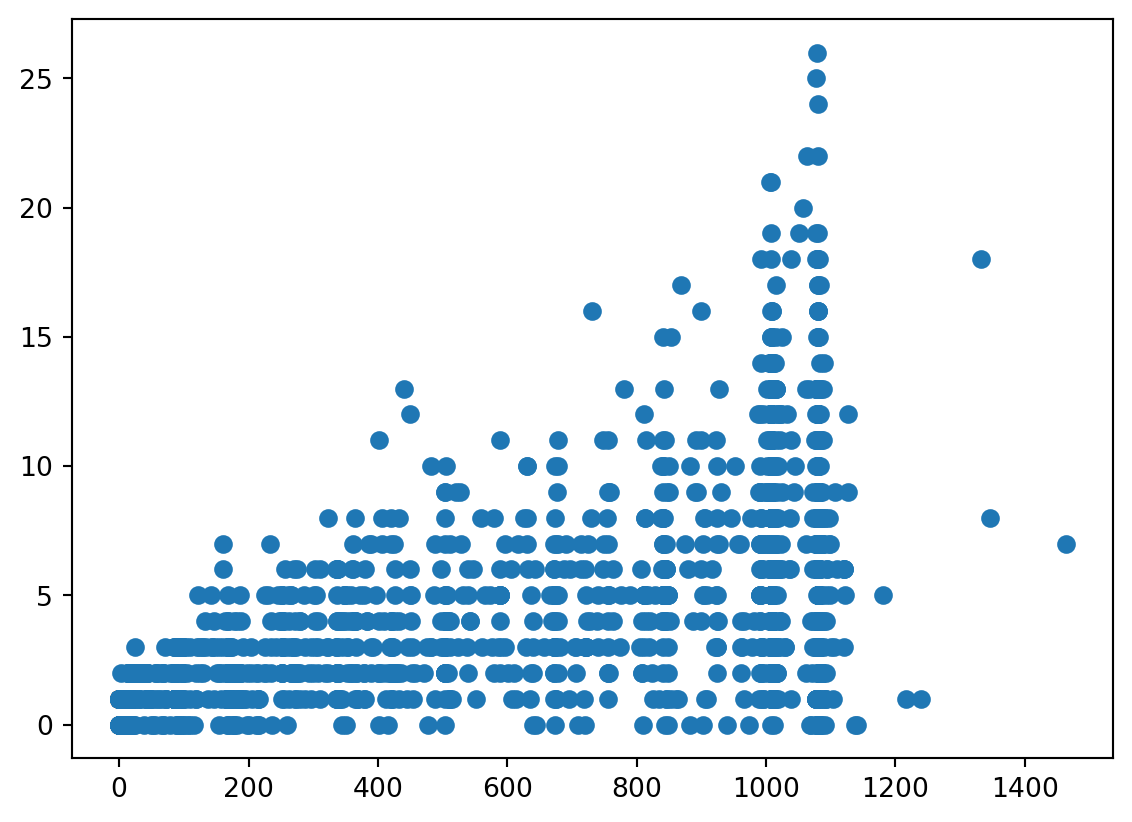

In [5]:
Malaria = Malaria[["Sexe","Prev","Duree","Nmalaria"]]
plt.plot(Malaria.Duree, Malaria.Nmalaria, 'o')

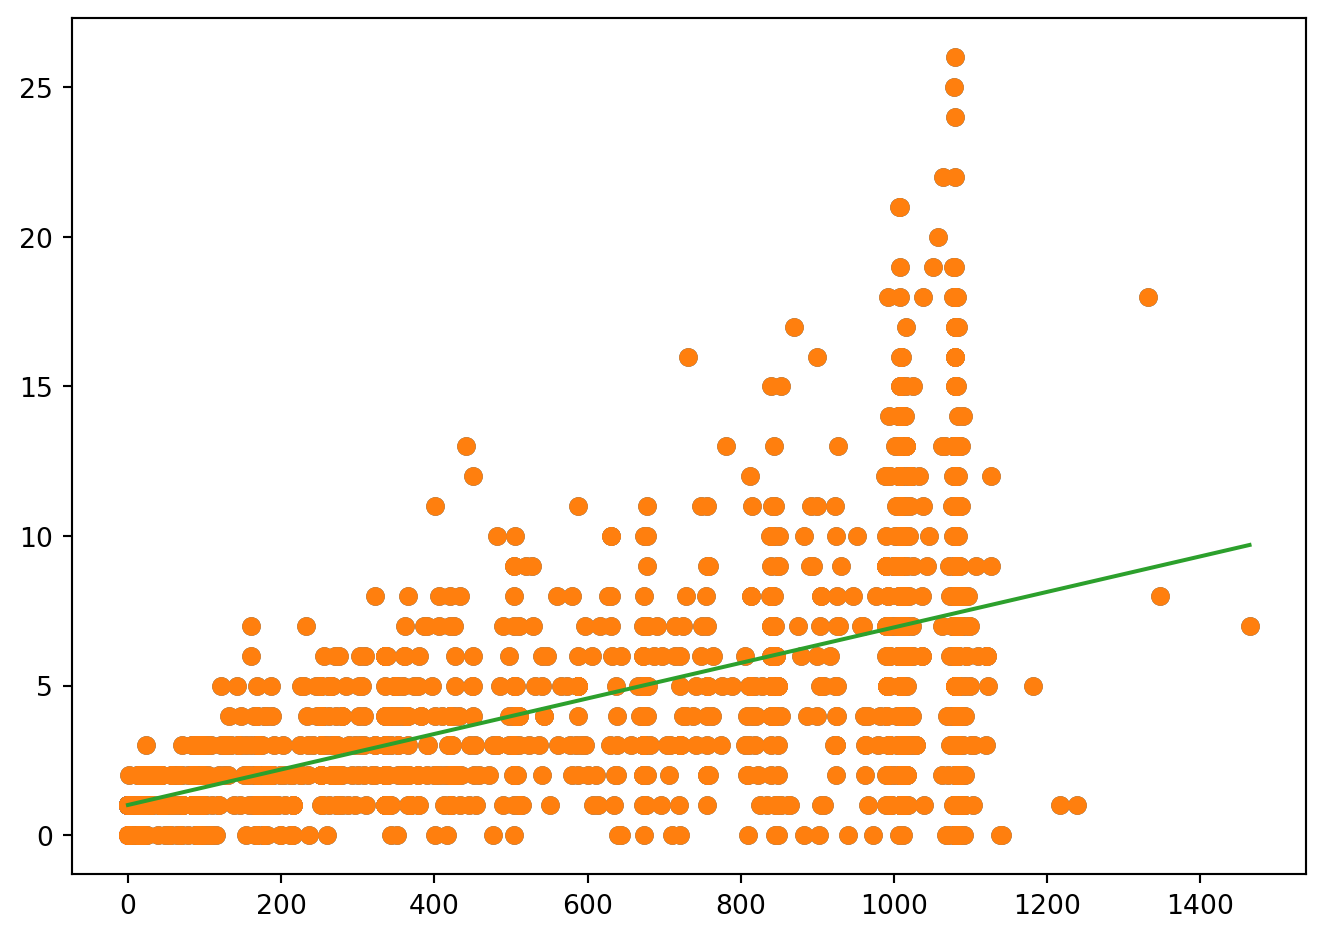

In [6]:
fig = plt.figure()
modele = smf.ols("Nmalaria ~ 1+ Duree", data = Malaria).fit()
plt.plot(Malaria.Duree, Malaria.Nmalaria, 'o')
grille = pd.DataFrame({'Duree': np.linspace(Malaria.Duree.min(), Malaria.Duree.max(), 2)})
calcprev = modele.get_prediction(grille)
plt.plot(Malaria.Duree, Malaria.Nmalaria, 'o', grille.Duree,  calcprev.predicted_mean, '-')
fig.tight_layout()

In [7]:
modP = smf.glm("Nmalaria ~ 1+ Duree", data = Malaria, family=sm.families.Poisson()).fit()
modP.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Nmalaria   No. Observations:                 1627
Model:                            GLM   Df Residuals:                     1625
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4060.3
Date:                Tue, 04 Feb 2025   Deviance:                       3325.2
Time:                        14:27:57   Pearson chi2:                 3.17e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7691
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4295      0.031     13.853      0.000       0.369       0.490
Duree          0.0015   3.42e-05     44.144      0.000       0.001       0.002
==============================================================================
"""

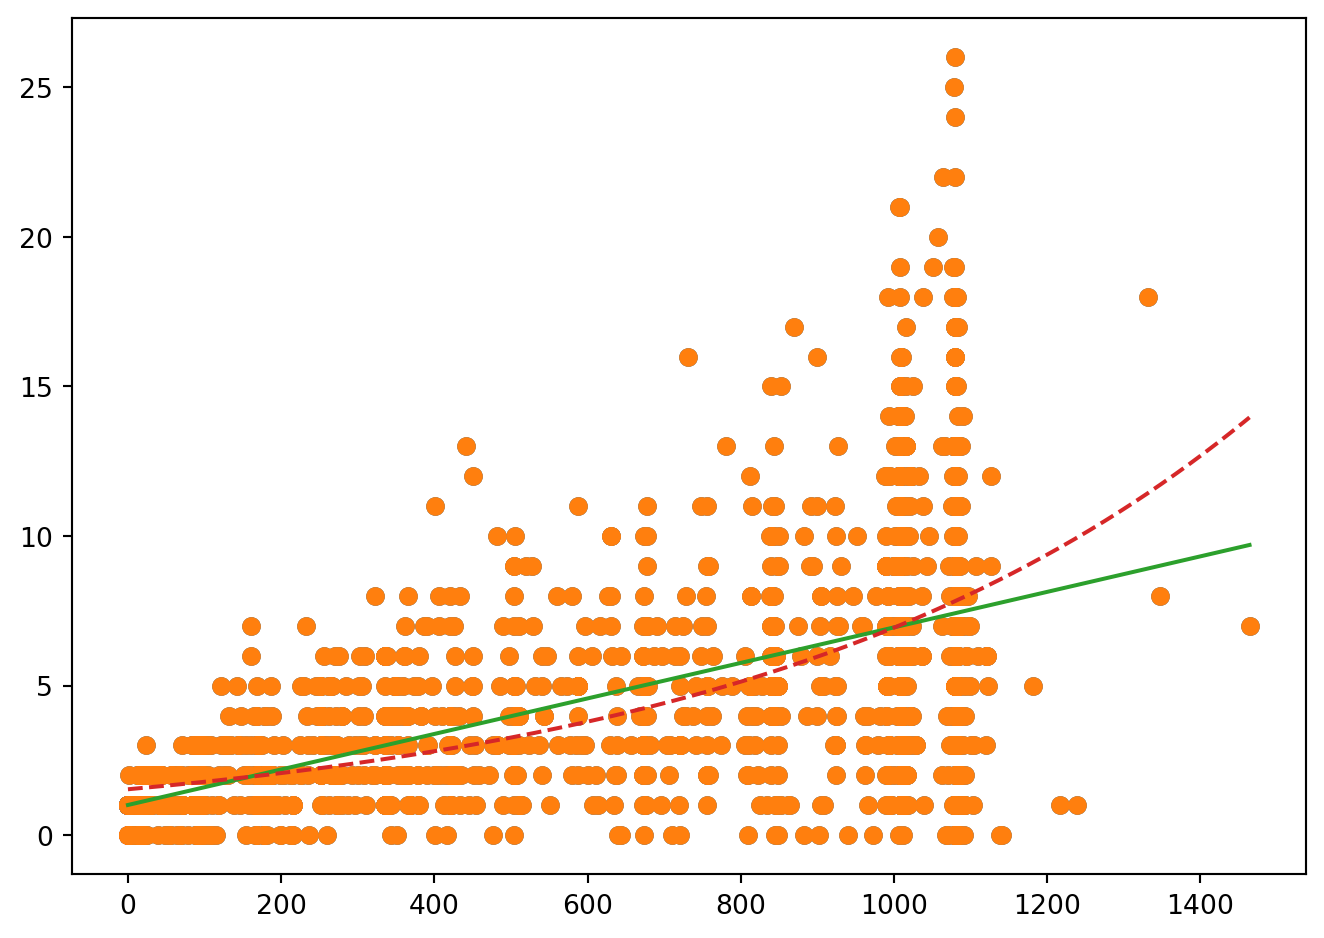

In [8]:
fig = plt.figure()
plt.plot(Malaria.Duree, Malaria.Nmalaria, 'o')
grille2 = pd.DataFrame({'Duree': np.linspace(Malaria.Duree.min(), Malaria.Duree.max(), 1500)})
calcprev2 = modP.get_prediction(grille2)
plt.plot(Malaria.Duree, Malaria.Nmalaria, 'o', grille.Duree,  calcprev.predicted_mean, '-', grille2.Duree,  calcprev2.predicted_mean, '--')
fig.tight_layout()

In [9]:
modP3 = smf.glm("Nmalaria ~ 1+ Duree + Sexe + Prev", data = Malaria, family=sm.families.Poisson()).fit()
print(modP3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Nmalaria   No. Observations:                 1627
Model:                            GLM   Df Residuals:                     1621
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4056.3
Date:                Tue, 04 Feb 2025   Deviance:                       3317.3
Time:                        14:27:57   Pearson chi2:                 3.17e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7703
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [10]:
mod3= smf.glm("Nmalaria ~ 1+ Duree + Sexe + C(Prev, Treatment('Rien'))", data = Malaria, family=sm.families.Poisson()).fit()
print(mod3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Nmalaria   No. Observations:                 1627
Model:                            GLM   Df Residuals:                     1621
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4056.3
Date:                Tue, 04 Feb 2025   Deviance:                       3317.3
Time:                        14:27:57   Pearson chi2:                 3.17e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.7703
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [11]:
modP2= smf.glm("Nmalaria ~ 1+ Duree + Sexe ", data = Malaria, family=sm.families.Poisson()).fit()

In [12]:
smlm.RegressionResults.compare_lr_test(modP3,modP2)

(2.4488233421689074, 0.4846108842015914, 3)

In [13]:
sp.stats.chi2.ppf(0.95,3)

7.814727903251179

In [14]:
print(modP3.conf_int(alpha=0.05))

                                0         1
Intercept               -0.191170  0.515791
Sexe[T.M]                0.010071  0.100107
Prev[T.Moustiquaire]    -0.104566  0.591101
Prev[T.Rien]            -0.123561  0.574727
Prev[T.Serpentin/Spray] -0.117722  0.608171
Duree                    0.001443  0.001577


In [15]:
Malaria = pd.read_csv("../donnees/poissonData.csv", header=0, sep=",")
Malaria.dropna(axis=0, inplace=True)

In [16]:
form ="Nmalaria ~ " + "+".join(Malaria.columns[ :-1 ])
mod_sel = choixglmstats.bestglm(Malaria, upper=form, family=sm.families.Poisson())

In [17]:
print(mod_sel.sort_values(by=["BIC","nb_var"]).iloc[:3,[1,3]])

                       var_added          BIC
13        (Altitude, Duree, Age)  7392.274194
20             (Altitude, Duree)  7395.141592
2   (Sexe, Altitude, Duree, Age)  7397.380825


In [18]:
print(mod_sel.sort_values(by=["AIC","nb_var"]).iloc[:3,[1,2]])

                             var_added          AIC
2         (Sexe, Altitude, Duree, Age)  7370.741923
13              (Altitude, Duree, Age)  7370.963072
0   (Sexe, Altitude, Duree, Prev, Age)  7374.648450
